In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

In [2]:

# Tentukan folder tempat file Excel berada
folder_path = 'filled_dataset'

# List semua file Excel dalam folder
files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# Gabungkan semua file Excel
df_list = [pd.read_excel(os.path.join(folder_path, file), index_col='Tanggal') for file in files]
# df = pd.read_excel(f"{folder_path}/{files[0]}", index_col='Tanggal')

# Gabungkan semua data menjadi satu DataFrame
df = pd.concat(df_list)
df.head()

# df2 = df.copy()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
Tanggal,,,,,,,,
2000-01-01,23.0,29.8,26.0,92,3.0,0.0,8,2
2000-01-02,24.0,29.7,26.1,91,14.0,2.2,8,2
2000-01-03,23.0,30.3,26.1,91,1.0,0.6,5,2
2000-01-04,24.0,29.6,24.4,97,25.0,2.7,6,0
2000-01-05,23.0,31.4,26.7,88,25.0,1.1,5,1


In [3]:
# Define target columns and units
target_cols = [
    ('Tn', '°C'),
    ('Tx', '°C'),
    ('Tavg', '°C'),
    ('RH_avg', '%'),
    ('RR', 'mm'),
    ('ss', 'jam'),
    ('ff_x', 'm/s'),
    ('ff_avg', 'm/s')
]

var_list = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ff_avg']
unit_list = ['°C', '°C', '°C', '%', 'mm', 'jam', 'm/s', 'm/s']

# Extract column names for easier indexing
target_column_names = [col[0] for col in target_cols]

def preprocess_data(df, target_column_names):
    # Select specified columns for training
    df = df[target_column_names]
    return df

# Adjust create_dataset function to accept multiple variables (features)
def create_dataset(dataset, time_step=3):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), :]
        dataX.append(a)
        dataY.append(dataset[i + time_step, :])
    return np.array(dataX), np.array(dataY)

d:\Applications\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 7, 64)          │        14,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 7, 32)          │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 7, 16)          │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │            72 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,712 (104.34 KB)

 Trainable params: 26,712 (104.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1586/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1136
Epoch 1: val_loss improved from inf to 0.07952, saving model to results\model_checkpoint_1.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.1135 - val_loss: 0.0795
Epoch 2/50
1595/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0780
Epoch 2: val_loss improved from 0.07952 to 0.07491, saving model to results\model_checkpoint_1.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0780 - val_loss: 0.0749
Epoch 3/50
1583/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0753
Epoch 3: val_loss improved from 0.07491 to 0.07368, saving model to results\model_checkpoint_1.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0753 - val_loss: 0.0737
Epoch 4/50
1597/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0730
Epoch 4: val_loss improved from 0.07368 to 0.07148, saving model to results\model_checkpoint_1.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0730 - val_loss: 0.0715
Epoch 5/50
1592/

d:\Applications\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 7, 64)          │        14,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 7, 32)          │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 7, 16)          │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,712 (104.34 KB)

 Trainable params: 26,712 (104.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1597/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1117
Epoch 1: val_loss improved from inf to 0.07884, saving model to results\model_checkpoint_2.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.1117 - val_loss: 0.0788
Epoch 2/100
1589/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0761
Epoch 2: val_loss improved from 0.07884 to 0.07329, saving model to results\model_checkpoint_2.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0761 - val_loss: 0.0733
Epoch 3/100
1595/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0724
Epoch 3: val_loss improved from 0.07329 to 0.07057, saving model to results\model_checkpoint_2.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0724 - val_loss: 0.0706
Epoch 4/100
1583/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0702
Epoch 4: val_loss improved from 0.07057 to 0.06876, saving model to results\model_checkpoint_2.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0702 - val_loss: 0.0688
Epoch 5/100

d:\Applications\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_8 (GRU)                     │ (None, 14, 64)         │        14,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 14, 32)         │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_10 (GRU)                    │ (None, 14, 16)         │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,712 (104.34 KB)

 Trainable params: 26,712 (104.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1594/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1091
Epoch 1: val_loss improved from inf to 0.07737, saving model to results\model_checkpoint_3.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.1091 - val_loss: 0.0774
Epoch 2/50
1597/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0773
Epoch 2: val_loss improved from 0.07737 to 0.07534, saving model to results\model_checkpoint_3.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0773 - val_loss: 0.0753
Epoch 3/50
1592/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0730
Epoch 3: val_loss improved from 0.07534 to 0.07277, saving model to results\model_checkpoint_3.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0730 - val_loss: 0.0728
Epoch 4/50
1597/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0697
Epoch 4: val_loss improved from 0.07277 to 0.06820, saving model to results\model_checkpoint_3.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0697 - val_loss: 0.0682
Epoch 5/50
1

d:\Applications\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_12 (GRU)                    │ (None, 14, 64)         │        14,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_13 (GRU)                    │ (None, 14, 32)         │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_14 (GRU)                    │ (None, 14, 16)         │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_15 (GRU)                    │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │            72 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,712 (104.34 KB)

 Trainable params: 26,712 (104.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1589/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1070
Epoch 1: val_loss improved from inf to 0.07599, saving model to results\model_checkpoint_4.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.1069 - val_loss: 0.0760
Epoch 2/100
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0779
Epoch 2: val_loss improved from 0.07599 to 0.07255, saving model to results\model_checkpoint_4.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0779 - val_loss: 0.0725
Epoch 3/100
1592/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0741
Epoch 3: val_loss improved from 0.07255 to 0.07162, saving model to results\model_checkpoint_4.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0741 - val_loss: 0.0716
Epoch 4/100
1596/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0719
Epoch 4: val_loss improved from 0.07162 to 0.07024, saving model to results\model_checkpoint_4.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0719 - val_loss: 0.0702
Epoch 5/100

d:\Applications\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_16 (GRU)                    │ (None, 7, 128)         │        52,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_17 (GRU)                    │ (None, 7, 64)          │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_18 (GRU)                    │ (None, 7, 32)          │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_19 (GRU)                    │ (None, 16)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,184 (399.16 KB)

 Trainable params: 102,184 (399.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1596/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1051
Epoch 1: val_loss improved from inf to 0.07645, saving model to results\model_checkpoint_5.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.1051 - val_loss: 0.0764
Epoch 2/50
1591/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0740
Epoch 2: val_loss improved from 0.07645 to 0.07341, saving model to results\model_checkpoint_5.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0740 - val_loss: 0.0734
Epoch 3/50
1595/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0700
Epoch 3: val_loss improved from 0.07341 to 0.07070, saving model to results\model_checkpoint_5.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0700 - val_loss: 0.0707
Epoch 4/50
1585/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0683
Epoch 4: val_loss improved from 0.07070 to 0.06735, saving model to results\model_checkpoint_5.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0683 - val_loss: 0.0674
Epoch 5/50
1587

d:\Applications\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_20 (GRU)                    │ (None, 7, 128)         │        52,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_21 (GRU)                    │ (None, 7, 64)          │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_22 (GRU)                    │ (None, 7, 32)          │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_23 (GRU)                    │ (None, 16)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,184 (399.16 KB)

 Trainable params: 102,184 (399.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1587/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0961
Epoch 1: val_loss improved from inf to 0.07543, saving model to results\model_checkpoint_6.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0960 - val_loss: 0.0754
Epoch 2/100
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0735
Epoch 2: val_loss improved from 0.07543 to 0.07036, saving model to results\model_checkpoint_6.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0735 - val_loss: 0.0704
Epoch 3/100
1593/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0701
Epoch 3: val_loss improved from 0.07036 to 0.06915, saving model to results\model_checkpoint_6.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0701 - val_loss: 0.0691
Epoch 4/100
1590/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0684
Epoch 4: val_loss improved from 0.06915 to 0.06766, saving model to results\model_checkpoint_6.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0684 - val_loss: 0.0677
Epoch 5/100

d:\Applications\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_24 (GRU)                    │ (None, 14, 128)        │        52,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_25 (GRU)                    │ (None, 14, 64)         │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_26 (GRU)                    │ (None, 14, 32)         │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_27 (GRU)                    │ (None, 16)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,184 (399.16 KB)

 Trainable params: 102,184 (399.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1591/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0957
Epoch 1: val_loss improved from inf to 0.07606, saving model to results\model_checkpoint_7.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0957 - val_loss: 0.0761
Epoch 2/50
1591/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0727
Epoch 2: val_loss improved from 0.07606 to 0.07416, saving model to results\model_checkpoint_7.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0727 - val_loss: 0.0742
Epoch 3/50
1597/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0691
Epoch 3: val_loss improved from 0.07416 to 0.06855, saving model to results\model_checkpoint_7.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0691 - val_loss: 0.0685
Epoch 4/50
1592/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0675
Epoch 4: val_loss improved from 0.06855 to 0.06825, saving model to results\model_checkpoint_7.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0675 - val_loss: 0.0682
Epoch 5/50
1

d:\Applications\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_28 (GRU)                    │ (None, 14, 128)        │        52,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_29 (GRU)                    │ (None, 14, 64)         │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_30 (GRU)                    │ (None, 14, 32)         │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_31 (GRU)                    │ (None, 16)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,184 (399.16 KB)

 Trainable params: 102,184 (399.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1595/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1053
Epoch 1: val_loss improved from inf to 0.07524, saving model to results\model_checkpoint_8.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.1053 - val_loss: 0.0752
Epoch 2/100
1592/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0737
Epoch 2: val_loss improved from 0.07524 to 0.07120, saving model to results\model_checkpoint_8.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0737 - val_loss: 0.0712
Epoch 3/100
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0702
Epoch 3: val_loss improved from 0.07120 to 0.07024, saving model to results\model_checkpoint_8.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0702 - val_loss: 0.0702
Epoch 4/100
1596/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0682
Epoch 4: val_loss improved from 0.07024 to 0.06911, saving model to results\model_checkpoint_8.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0682 - val_loss: 0.0691
Epoch 5/

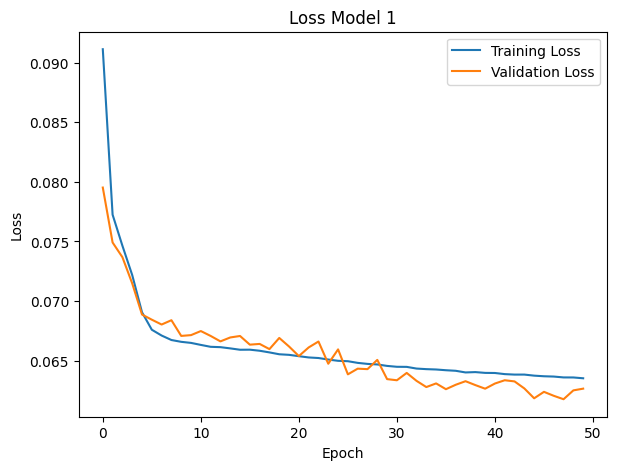

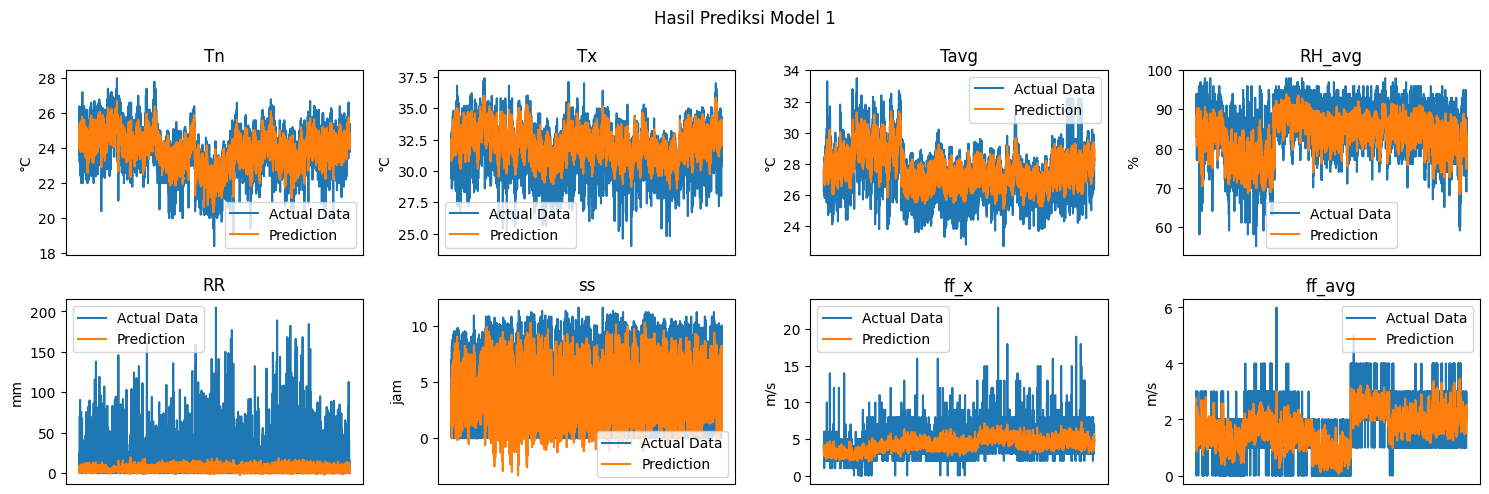

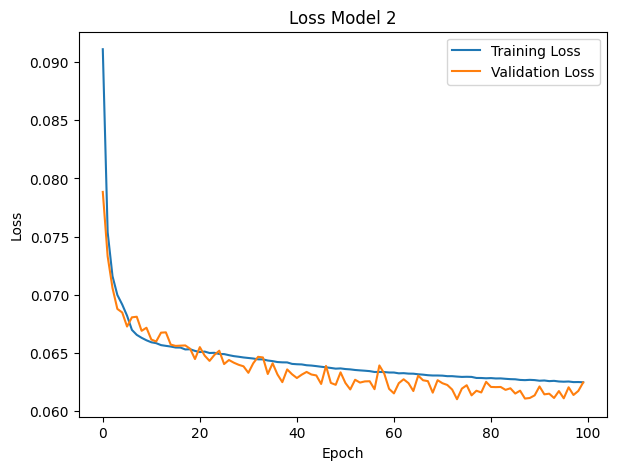

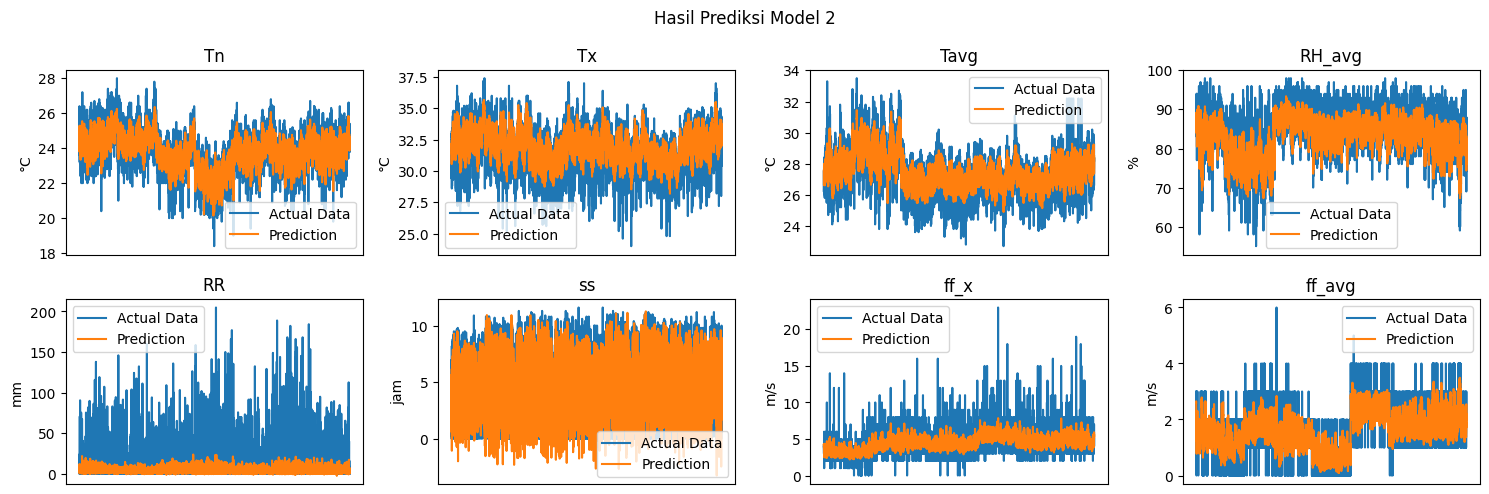

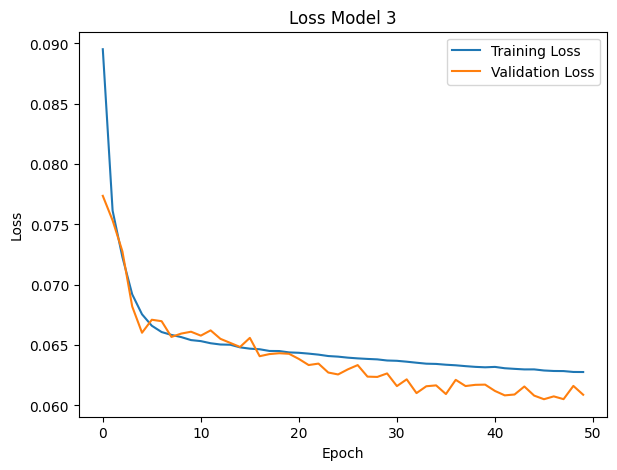

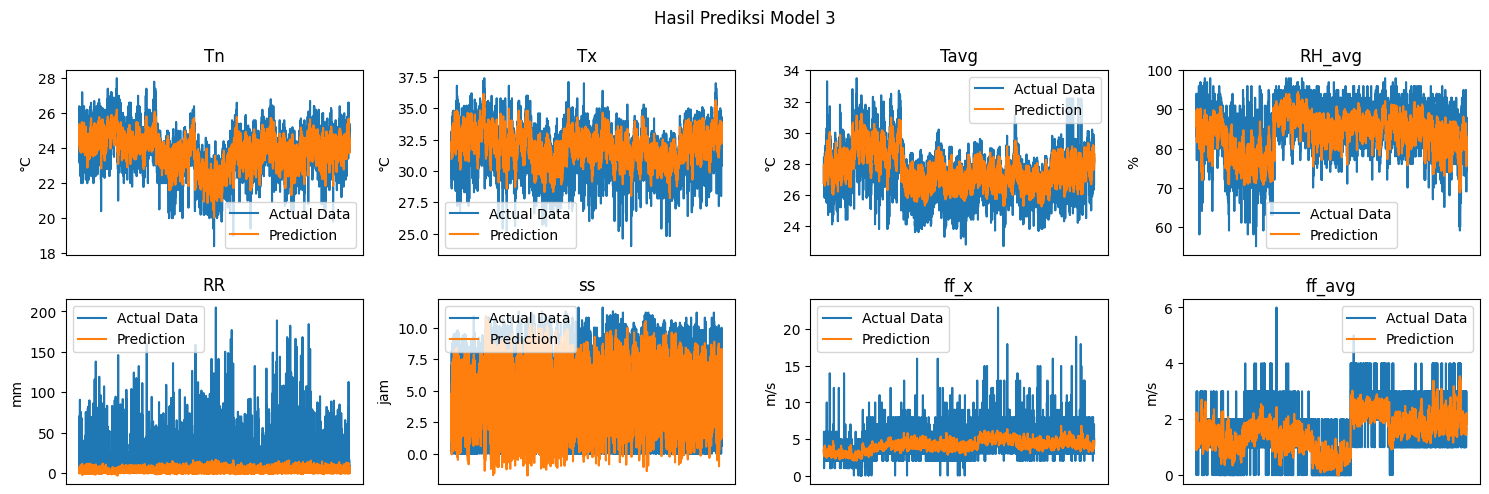

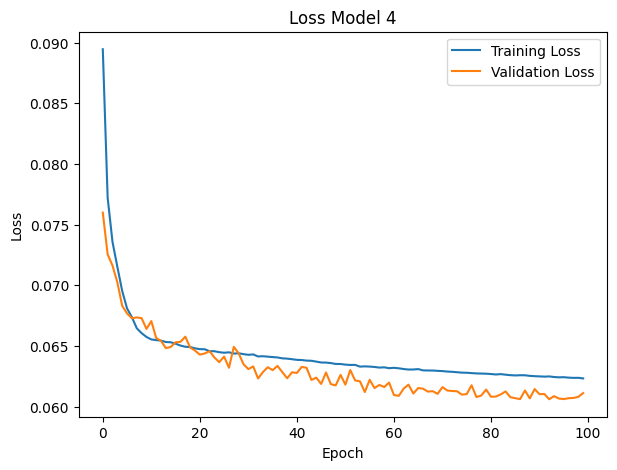

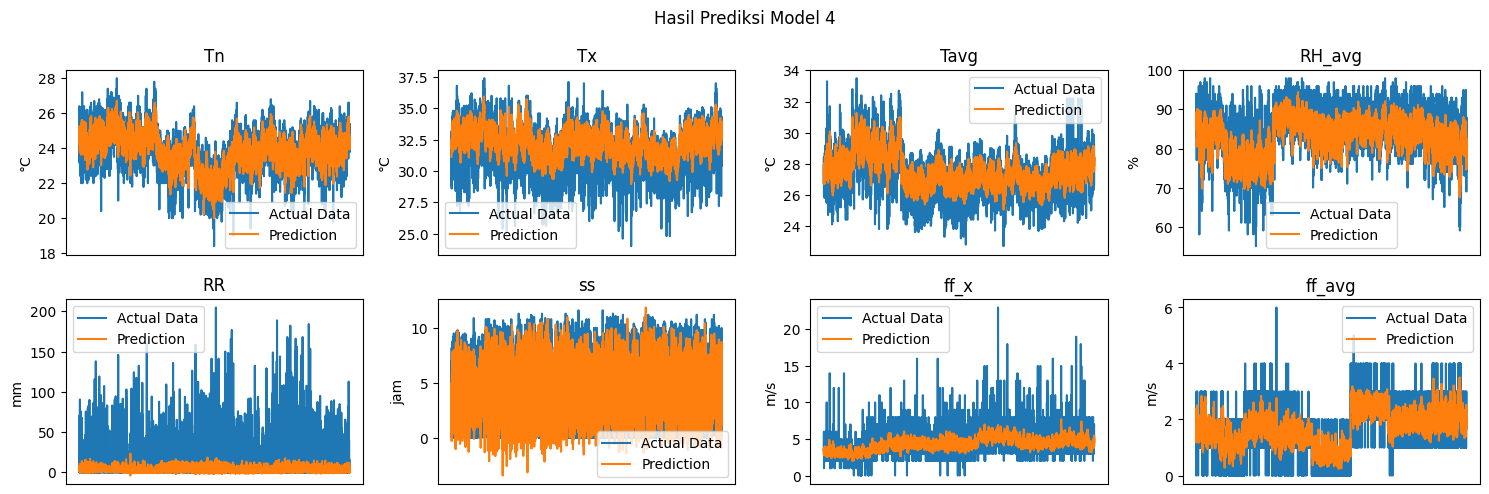

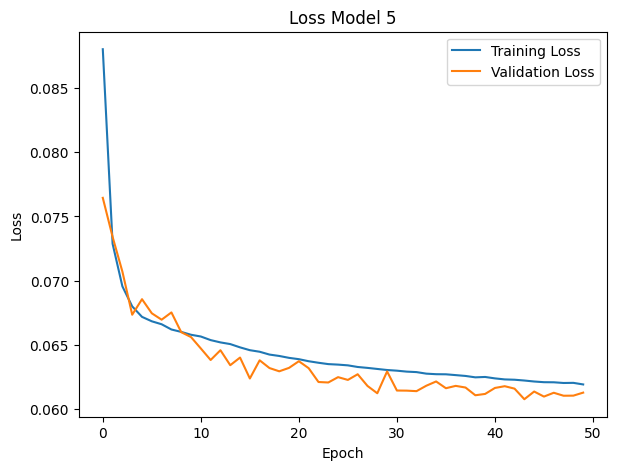

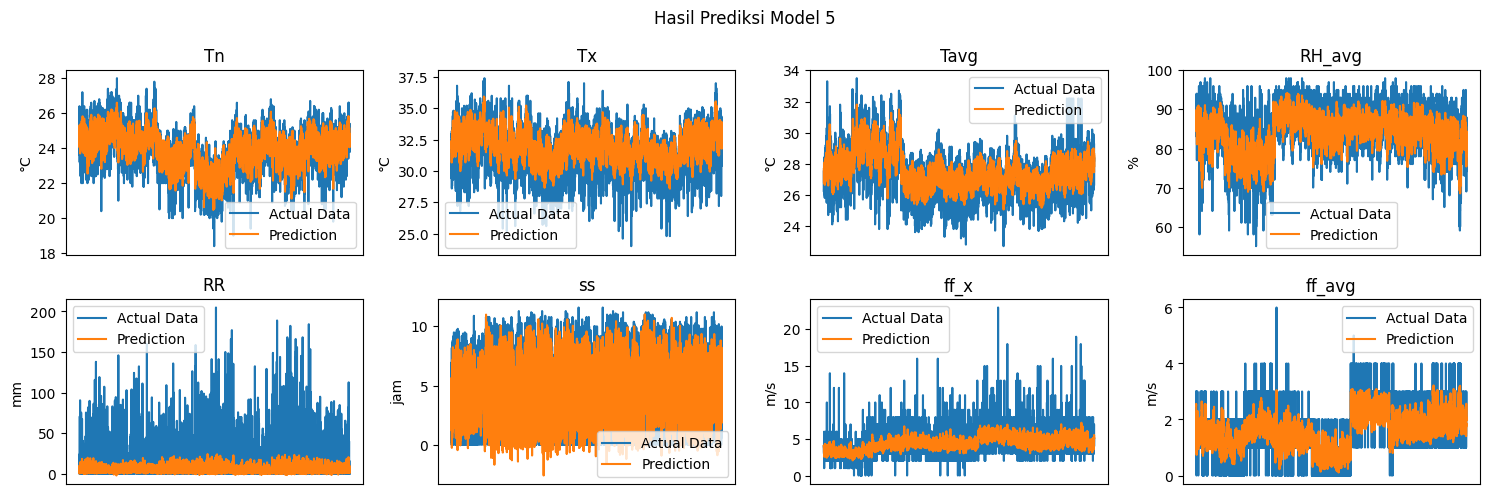

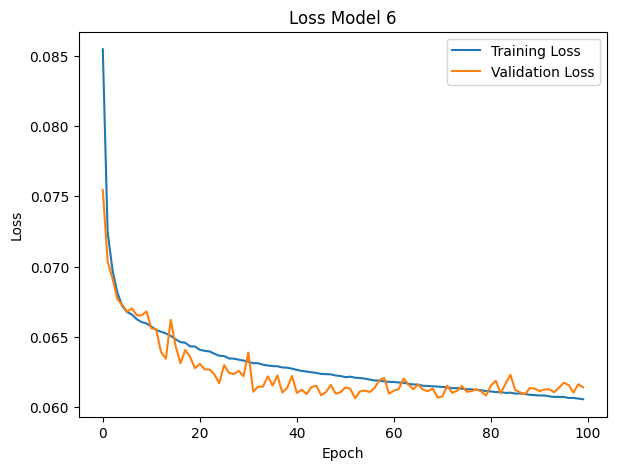

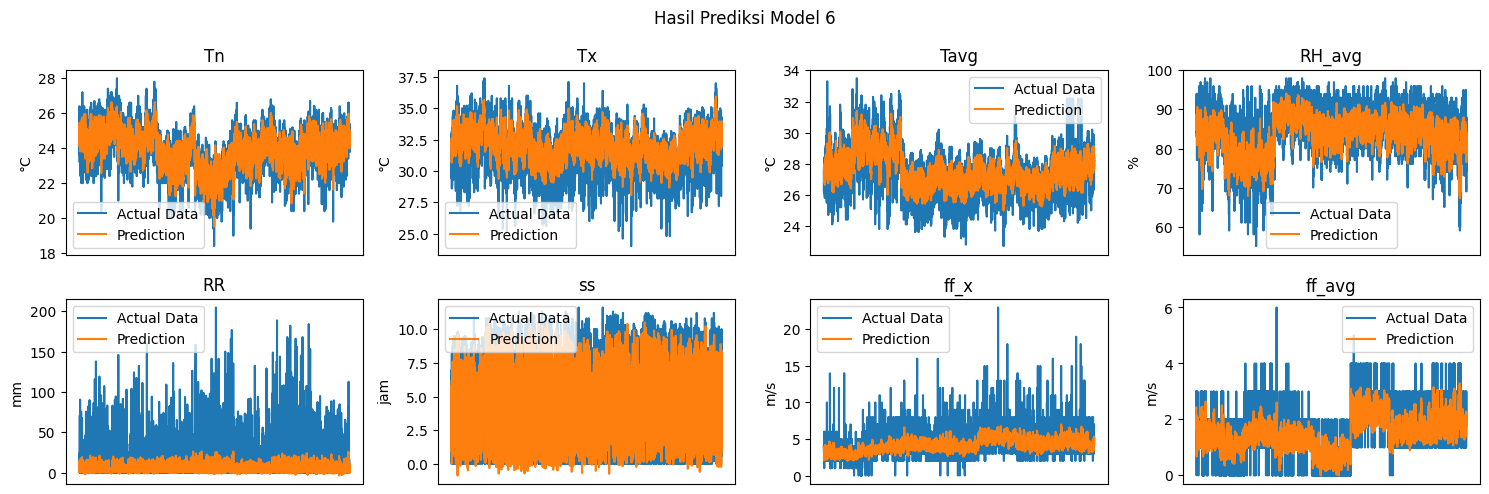

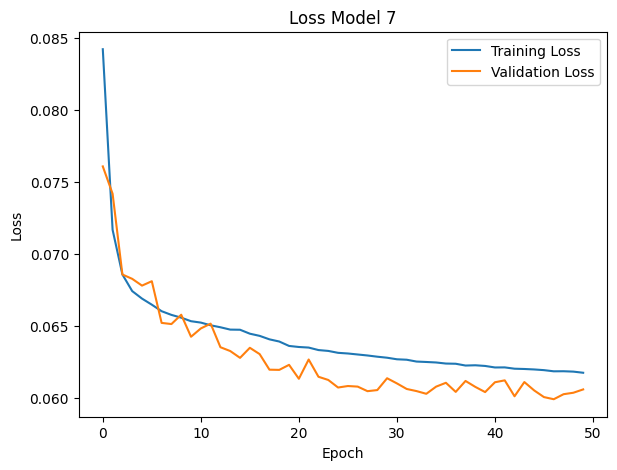

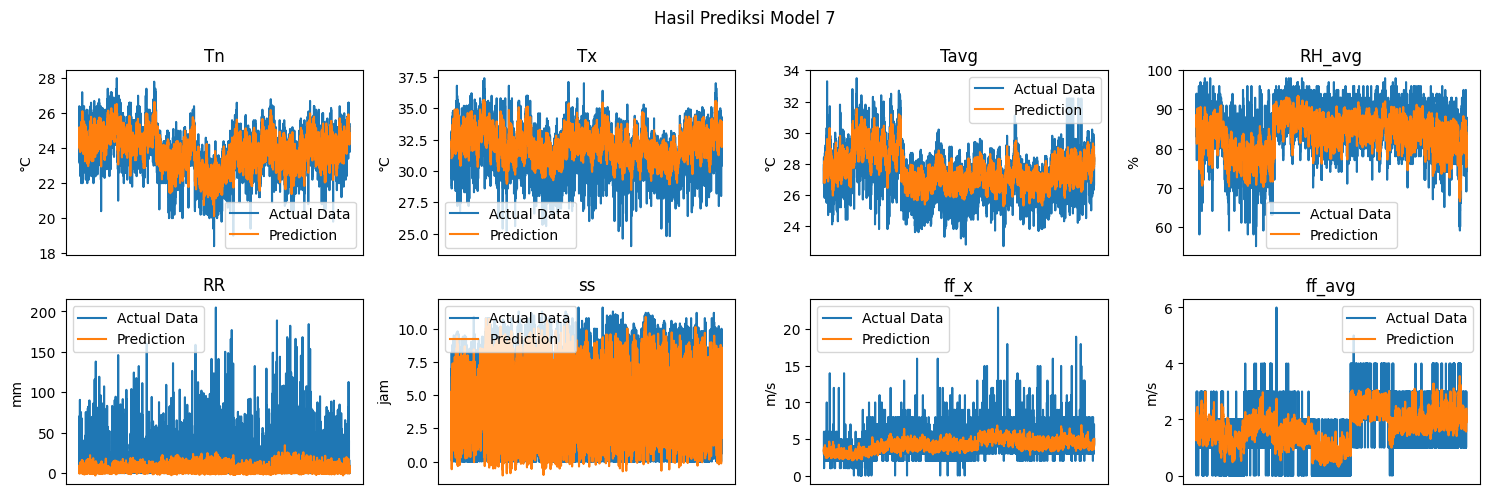

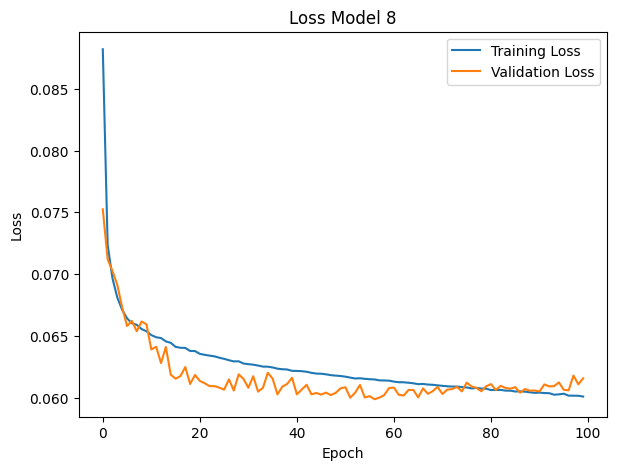

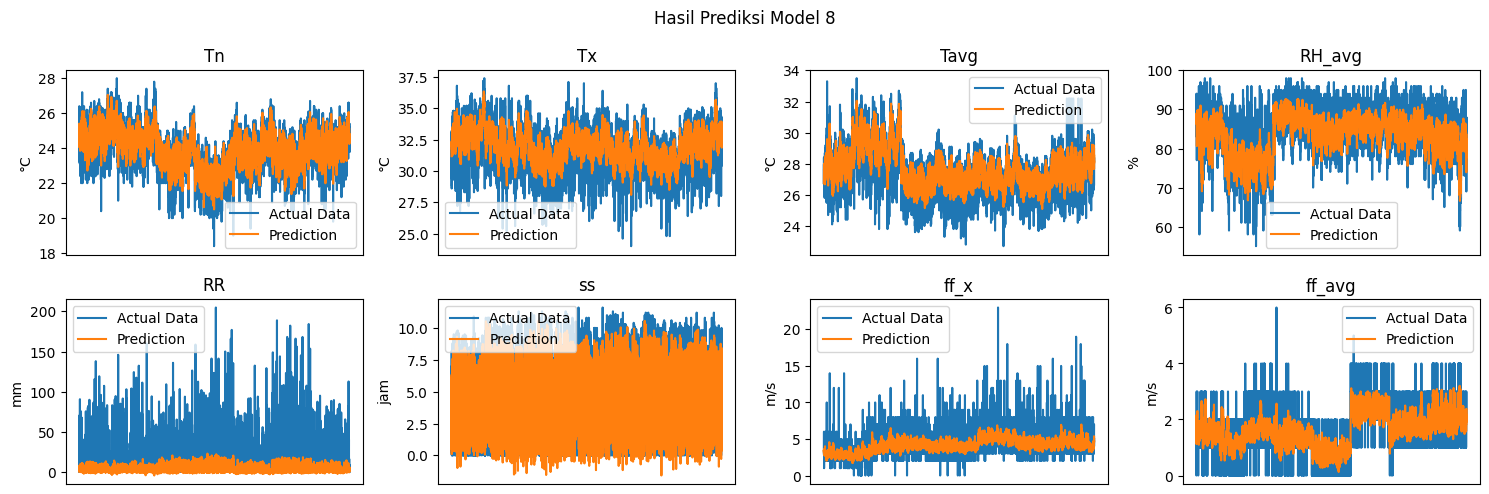

In [ ]:
# Parameters for training
time_steps = [7, 14]
optimizer_list = [('Adam', optimizers.Adam)]
learning_rates = [0.001]
units = [64, 128]
batch_sizes = [32]
epochs = [50, 100]

# Store results and history
all_actuals = []
all_predictions = []
history_dict = {}
results = []
individual_results = []
index_counter = 0

# Training loop
for name, opt in optimizer_list:
    for lr in learning_rates:
        for ut in units:
            for batch in batch_sizes:
                for time_step in time_steps:
                    for epoch in epochs:
                        try:

                            index_counter += 1

                            checkpoint_path = os.path.join('results', f'model_checkpoint_{index_counter}.keras')
                            checkpoint = ModelCheckpoint(
                                checkpoint_path,
                                monitor='val_loss',
                                save_best_only=True,
                                mode='min',
                                verbose=1
                            )
                            # Prepare data with multiple columns
                            df_col = preprocess_data(df, target_column_names)
                            
                            # Split into training and testing datasets
                            cutoff_date = pd.to_datetime('2020-01-01')
                            train = df_col[df_col.index < cutoff_date]
                            test = df_col[df_col.index >= cutoff_date]

                            # Normalize data
                            scaler = MinMaxScaler()
                            train = scaler.fit_transform(train)
                            test = scaler.transform(test)

                            # Create dataset with time step
                            X_train, y_train = create_dataset(train, time_step)
                            X_test, y_test = create_dataset(test, time_step)

                            # Reshape for GRU input [samples, time steps, features]
                            num_features = X_train.shape[2]
                            X_train = X_train.reshape(X_train.shape[0], time_step, num_features)
                            X_test = X_test.reshape(X_test.shape[0], time_step, num_features)

                            # Build GRU model
                            model = Sequential()
                            model.add(GRU(int(ut), activation='sigmoid', return_sequences=True, input_shape=(time_step, num_features)))
                            model.add(GRU(int(ut/2), activation='relu', return_sequences=True))
                            model.add(GRU(int(ut/4), return_sequences=True))
                            model.add(GRU(int(ut/8)))
                            model.add(Dense(num_features))

                            # Compile the model
                            model.compile(loss='mae', optimizer=opt(learning_rate=lr))
                            model.summary()


                            # Train the model
                            history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch, batch_size=batch, verbose=1, callbacks=[checkpoint])
                            # Save the training history
                            history_dict["GRU Model"] = history



                            model.load_weights(checkpoint_path)

                            # Predict on test data
                            y_pred = model.predict(X_test)

                            # Inverse transform to original scale
                            y_test_inv = scaler.inverse_transform(y_test)
                            y_pred_inv = scaler.inverse_transform(y_pred)

                            all_actuals.append(y_test_inv)
                            all_predictions.append(y_pred_inv)

                            # Plot actual vs. predicted values
                            # plt.figure(figsize=(10, 5))
                            # plt.plot(y_test_inv[:, 0], label='Actual Data (Tn)')
                            # plt.plot(y_pred_inv[:, 0], label='Prediction (Tn)')
                            # plt.legend()
                            # plt.title('Forecasting Results for Tn Using GRU')
                            # plt.ylabel('Value in °C')
                            # plt.show()

                            # Plot grafik nilai loss
                            # plt.figure(figsize=(15, 5))
                            # plt.subplot(1, 2, 1)
                            # plt.plot(history.history['loss'], label='Training Loss')
                            # plt.plot(history.history['val_loss'], label='Validation Loss')
                            # plt.title(f'Loss Model {index_counter}')
                            # plt.xlabel('Epoch')
                            # plt.ylabel('Loss')
                            # plt.legend()
                            # plt.savefig(f'gambar_loss/model_{index_counter}.png')
                            # plt.show()


                            # # Calculate evaluation metrics
                            # mae = mean_absolute_error(y_test_inv, y_pred_inv)
                            # rmse = root_mean_squared_error(y_test_inv, y_pred_inv)
                            # r2 = r2_score(y_test_inv, y_pred_inv)
                            # print('MAE:', mae)
                            # print('RMSE:', rmse)
                            # print('R2:', r2)

                            # Menentukan jumlah baris dan kolom subplot
                            num_rows = 2  # Jumlah baris
                            num_cols = 4  # Jumlah kolom

                            # Membuat subplot dengan layout yang ditentukan
                            fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
                            fig.suptitle(f'Hasil Prediksi Model {index_counter}')
                            for i, ax in enumerate(axes.flat):
                                ax.plot(y_test_inv[:, i], label='Actual Data')
                                ax.plot(y_pred_inv[:, i], label='Prediction')
                                ax.set_title(var_list[i])
                                ax.set_ylabel(unit_list[i])
                                # ax.tick_params(axis='x', rotation=45)
                                ax.legend()
                                ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
                                

                            # Mengatur tampilan subplot agar tidak terlalu rapat
                            plt.tight_layout()

                            # Menampilkan gambar
                            # plt.show()
                            plt.savefig(f'gambar_pred/model_{index_counter}.png')


                            i = 0
                            for col, unit in target_cols:
                                # plt.figure(figsize=(10, 5))
                                # plt.plot(y_test_inv[:, i], label=f'Actual Data {col}')
                                # plt.plot(y_pred_inv[:, i], label=f'Prediction {col}')
                                # plt.legend()
                                # plt.title(f'Forecasting Results for {col} Using GRU')
                                # plt.ylabel(f'Value in {unit}')
                                # plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
                                # plt.show()
                                
                                mae = mean_absolute_error(y_test_inv[:, i], y_pred_inv[:, i])
                                rmse = root_mean_squared_error(y_test_inv[:, i], y_pred_inv[:, i])
                                r2 = r2_score(y_test_inv[:, i], y_pred_inv[:, i])
                                # print('MAE:', mae)
                                # print('RMSE:', rmse)
                                # print('R2:', r2)
                                
                                # Store the results
                                individual_results.append({
                                    'index_counter': index_counter,
                                    'Var': col,
                                    'TimeStep': time_step,
                                    'Optimizer': name,
                                    'Learning Rate': lr,
                                    'Units': ut,
                                    'Batch Size': batch,
                                    'Epochs': epoch,
                                    'MAE': mae,
                                    'RMSE': rmse,
                                    'R²': r2
                                })
                                i += 1

                            
                            print(f"Model with: Optimizer: {name}, LR: {lr}, Units: {ut}, Batch Size: {batch}, Epochs: {epoch}")
                            mae = mean_absolute_error(y_test_inv, y_pred_inv)
                            rmse = root_mean_squared_error(y_test_inv, y_pred_inv)
                            r2 = r2_score(y_test_inv, y_pred_inv)
                            print('MAE:', mae)
                            print('RMSE:', rmse)
                            print('R2:', r2)

                            # Store the results
                            results.append({
                                'index_counter': index_counter,
                                'TimeStep': time_step,
                                'Optimizer': name,
                                'Learning Rate': lr,
                                'Units': ut,
                                'Batch Size': batch,
                                'Epochs': epoch,
                                'MAE': mae,
                                'RMSE': rmse,
                                'R²': r2
                            })

                        except Exception as e:
                            print(f"Error with configuration: Optimizer: {name}, LR: {lr}, Units: {ut}, Batch Size: {batch}, Epochs: {epoch}")
                            print(f"Error: {str(e)}")
                            continue

# Convert results to a DataFrame and save to Excel

files = [f for f in os.listdir('gru_result') if f.endswith('.xlsx')]
results_df = pd.DataFrame(results)
results_df.to_excel(f'gru_result/model_results_with_errors_gru_{len(files) + 1}.xlsx', index=False)

individual_results_df = pd.DataFrame(individual_results)
individual_results_df.to_excel(f'gru_individual_result/model_individual_results_with_errors_gru_{len(files) + 1}.xlsx', index=False)
